In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import ipywidgets as ipw
import torch
import time

import programs.NN as NN
import programs.visualize as vis
import programs.misc as misc
import programs.objects as obj

from programs.Poisson_Convection import *
from programs.misc import *

In [2]:
torch.manual_seed(1234)
np.random.seed(1234)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device='cpu'
torch.cuda.set_device(device)
print(device)

cuda:0


In [3]:
# Ширина трещины
w = 1.5

# Вязкость
mu0 = 0.01

# Максимальная концентрация проппанта
cmax = 0.65

# Концентрация входящего проппанта в первый момент времени
c1 = 0.45

# Концентрация входящего проппанта во второй момент времени
c2 = 0.0

# Интервалы смены концентрации
transitional_times = [0.5]

# Скорость потока
u_in = 1.

# Длина интервала перфорации
chi = 0.4

# Степень в вязкости
beta = -3.5

# Число точек для ГУ (возводится в квадрат)
BC_points = 64

# Число точек для НУ (возводится в квадрат)
IC_points = 64

# Число точек коллокации (возводится в куб)
PDE_points = 32

# Границы для x,y,t
x_min, x_max, y_min, y_max, t_min, t_max = 0.0, 1.0, 0.0, 1.0, 0.0, 1.0
boundaries = [x_min, x_max, y_min, y_max, t_min, t_max]

# Массивы условий
cond = u_in * -12
mu1 = cond * misc.viscosity(mu0,c1,cmax,beta)
mu2 = cond * misc.viscosity(mu0,c2,cmax,beta)
c_condition = [c1, c2]
print (cond*mu0/w**2, misc.viscosity(mu0,np.array(c_condition),cmax,beta))
print (misc.compare_viscosity(c1,c2,cmax,beta))

-0.05333333333333333 [0.61885907 0.01      ]
61.88590743901862


In [4]:
net = Poisson_Convection({'w':w,
                          'mu0':mu0,
                          'cmax':cmax,
                          'u_in':u_in,
                          'chi':chi,
                          'times':transitional_times,
                          'size':boundaries,
                          'c_cond':c_condition,
                          'PDE_points':PDE_points,
                          'BC_points':BC_points,
                          'IC_points':IC_points,
                          'beta':beta,
                          'w_func':'elliptic',
                          'w1':-1,
                          'w2':1.5,
                          'w3':0.5,
                          'w4':0.5,
                          'save_after': True,
                          'path':'data/January_22',
                          'NN_params' : {'input_size' : 3,
                                         # 'neurons_arr': [64, 64, 128, 256, 128, 64, 64],
                                         'neurons_arr': [48,48,48,48,48],
                                         # 'neurons_arr': [48]*20,
                                         'output_size' : 3,
                                         'depth' : 4,
                                        
                                        }
                          })
net.model.apply(NN.Net.init_weights)

Net(
  (layers): Sequential(
    (input): Linear(in_features=3, out_features=48, bias=True)
    (input_activation): Sin()
    (hidden_0): Linear(in_features=48, out_features=48, bias=True)
    (activation_0): Sin()
    (hidden_1): Linear(in_features=48, out_features=48, bias=True)
    (activation_1): Sin()
    (hidden_2): Linear(in_features=48, out_features=48, bias=True)
    (activation_2): Sin()
    (hidden_3): Linear(in_features=48, out_features=48, bias=True)
    (activation_3): Sin()
    (output): Linear(in_features=48, out_features=3, bias=True)
  )
)

In [5]:
# # net.update_width(func_name='elliptic', w=1.5, w1=-1, w2=1.5, w3=0.5, w4=0.5)
# x = torch.linspace(0,1,100)
# y = torch.linspace(0,1,200)
# x, y = torch.meshgrid(x,y, indexing='ij')
# plt.imshow(net.w_func(x,y).cpu().T, extent=[0,1,1,0], cmap='seismic')
# plt.title('width')
# # plt.clim(0,2)
# plt.colorbar()
# net.w_func(x,y).max(), net.w_func(x,y).min()

# plt.scatter(net.x_IC.data.cpu(),net.y_IC.data.cpu(),c=net.c_IC.data.cpu())
# plt.scatter(net.x_IC.data.cpu(),net.y_IC.data.cpu(),c=misc.psi(net.x_IC.data.cpu(), net.chi, 1)*misc.psi(net.y_IC.data.cpu(), net.chi, 1))
# plt.colorbar()

In [6]:
# net.update_from_file("data/January_8/51002")
# net.save("data/test_make")
# net.load('data/January_20/213275')
# vars(net)
# a = misc.psi(net.y_IC, net.chi)*torch.where(net.x_IC==0, 1, 0)
# for i in range(len(net.c_IC)):
    # if round(net.x_IC[i].item(),4)==0.0:
        # print ('-'*50)
    # print (i+1, round(net.c_IC[i].item(),4), round(net.x_IC[i].item(),4), round(net.y_IC[i].item(),4), round(net.t_IC[i].item(),4))
    # print (i+1, round(net.c_IC[i].item(),4), round(a[i].item(),4), round(net.x_IC[i].item(),4), round(net.y_IC[i].item(),4), round(net.t_IC[i].item(),4))

# for i in range(len(net.c)):
    # print (i+1, net.c[i].item(), net.p[i].item(), round(net.x_BC[i].item(), 4), round(net.y_BC[i].item(),4))#, round(net.t_BC[i].item(),4))

# for i in range(len(net.X)):
    # print (i+1,  round(cc[i].item(),4), round(net.X[i].item(), 4), round(net.Y[i].item(),4), round(net.T[i].item(),4))
# for i in range(len(net.c)):
    # print (i+1, net.X[i].item(),net.x_IC[i].item())

In [ ]:
net.weights = [0.1,0.1,1.5,2,1.5,1.5,0,0]
# net.Adam_epochs = net.epoch + 1000
start_time = time.time()
net.max_epoch = 150000
net.max_iter = 3
net.train()
net.make_distributed_points()
net.train()
# net.save(f'data/January_8/{net.epoch}')
end_time = time.time()
elapsed_time = end_time - start_time

|     Epochs     |      PDE loss       |     p corr loss     |       IC loss       |       BC loss       |    Summary loss     |      time      |
|       0        |      0.885479       |      0.261996       |      0.001285       |      16.900675      |      18.049435      |    1.728576    |
|       10       |      0.002576       |      0.952791       |      0.328667       |      6.113377       |      7.397411       |    0.640151    |
|       20       |      0.022239       |      0.749202       |      0.187134       |      4.626318       |      5.584893       |    0.615161    |
|       30       |      0.027778       |       0.5059        |      0.242893       |      4.089601       |      4.866171       |    0.615032    |
|       40       |      0.005005       |      0.412371       |      0.344929       |      3.801667       |      4.563971       |    0.615395    |
|       50       |      0.005125       |       0.36154       |      0.335113       |      3.572774       |      4.274553    

In [8]:
net.save(f'data/January_19/{net.epoch}')

In [ ]:
try:
    print('Elapsed time: ', elapsed_time)
except NameError: pass

0.1629614531993866 46011


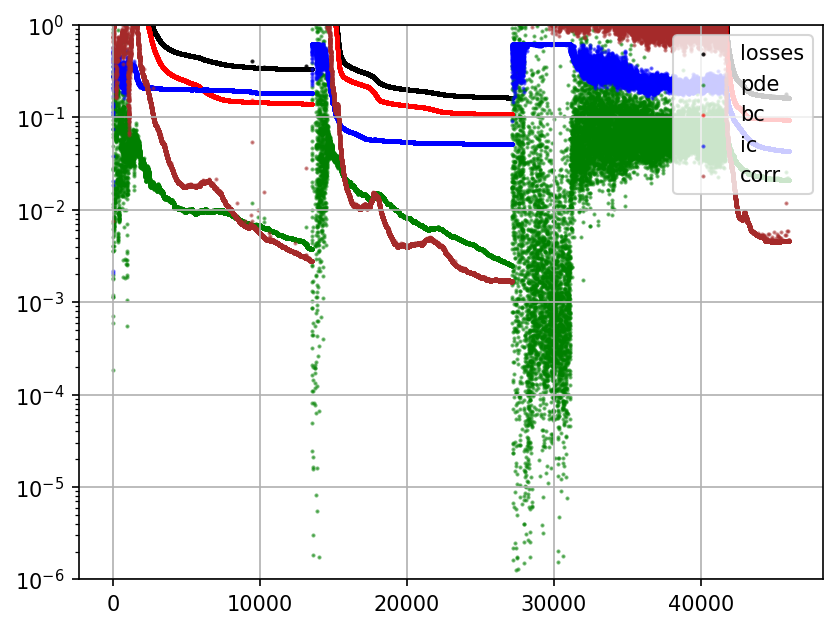

In [12]:
print (net.losses[-1], len(net.losses))
fig = plt.figure(dpi=150)
plt.scatter(range(0,len(net.losses)), net.losses,label='losses', c='black',alpha=0.8, s=1)
plt.scatter(range(0,len(net.PDE)), net.PDE,label='pde', c='green',alpha=0.5, s=1)
plt.scatter(range(0,len(net.BC)), net.BC, label='bc', c='red',alpha=0.5, s=1)
plt.scatter(range(0,len(net.IC)), net.IC, label='ic', c='blue',alpha=0.5, s=1)
plt.scatter(range(0,len(net.corr)), net.corr, label='corr', c='brown',alpha=0.5, s=1)
plt.legend(loc='upper right')
plt.grid()
# plt.savefig("gifs/losses")
plt.ylim(1e-6,1)
plt.yscale('log')

In [ ]:
path = 'data/end'
net.save(path)

In [ ]:
3+4